In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [2]:
data = pd.read_csv('intc.csv')

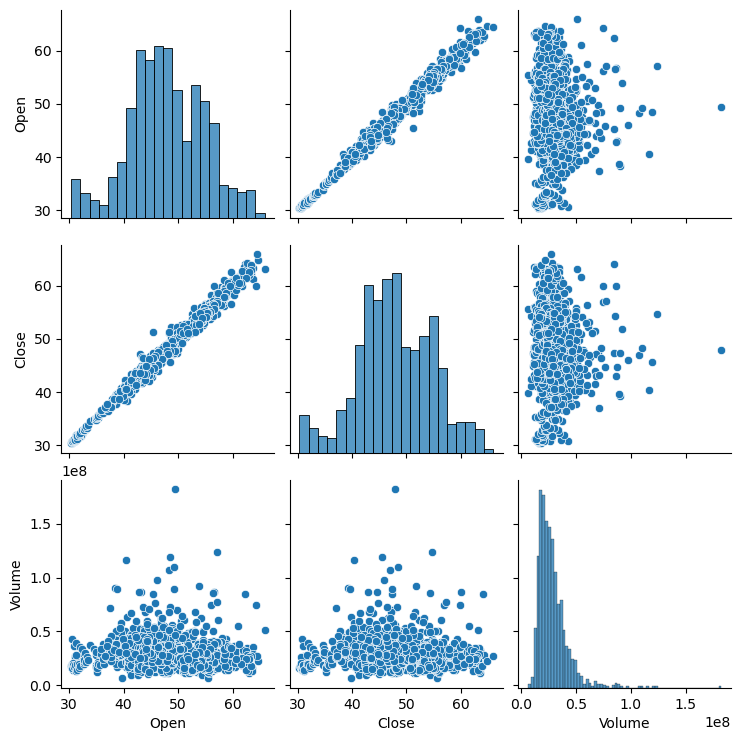

In [3]:
import seaborn as sns
sns.pairplot(data[['Open','Close','Volume']])

In [4]:
data['returns'] = np.log(data['Close']/data['Close'].shift(1))

In [5]:
data['target'] = np.where(data.returns.shift(-1)>0,1,-1)

In [6]:
data['target'].value_counts()

 1    645
-1    613
Name: target, dtype: int64

In [7]:
features_list = ["News Sentiments"]


for i in range(5, 20, 5):
    col_name = 'std_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).std()
    features_list.append(col_name)
    

for i in range(10, 30, 5):
    col_name = 'ma_' + str(i)
    data[col_name] = data['Close'].rolling(window=i).mean()
    features_list.append(col_name)
    

for i in range(3, 12, 3):
    col_name = 'pct_' + str(i)
    data[col_name] = data['Close'].pct_change().rolling(i).sum()
    features_list.append(col_name)
    

col_name = 'vma_4'
data[col_name] = data['Volume'].rolling(4).mean()
features_list.append(col_name)


col_name = 'co'
data[col_name] = data['Close'] - data['Open']
features_list.append(col_name)

In [8]:
features_list

['News Sentiments',
 'std_5',
 'std_10',
 'std_15',
 'ma_10',
 'ma_15',
 'ma_20',
 'ma_25',
 'pct_3',
 'pct_6',
 'pct_9',
 'vma_4',
 'co']

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             1258 non-null   object 
 1   Open             1258 non-null   float64
 2   High             1258 non-null   float64
 3   Low              1258 non-null   float64
 4   Close            1258 non-null   float64
 5   Volume           1258 non-null   int64  
 6   Dividends        1258 non-null   float64
 7   Stock Splits     1258 non-null   int64  
 8   News Sentiments  1258 non-null   object 
 9   returns          1257 non-null   float64
 10  target           1258 non-null   int32  
 11  std_5            1254 non-null   float64
 12  std_10           1249 non-null   float64
 13  std_15           1244 non-null   float64
 14  ma_10            1249 non-null   float64
 15  ma_15            1244 non-null   float64
 16  ma_20            1239 non-null   float64
 17  ma_25         

In [10]:
data.dropna(inplace=True)

In [11]:
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,News Sentiments,returns,...,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co
24,25-08-2017,30.850896,30.948357,30.638255,30.717993,14726800,0.0,0,1.962872649,-0.001153,...,0.663630,31.182269,31.505367,31.622700,31.425884,0.000579,-0.014274,-0.046779,18693650.0,-0.132903
25,28-08-2017,30.815454,30.833175,30.647114,30.700275,20712900,0.0,0,2.564720845,-0.000577,...,0.657485,31.032533,31.400227,31.598081,31.440310,-0.000287,-0.010301,-0.038000,17347425.0,-0.115179
26,29-08-2017,30.576237,30.788881,30.531937,30.771160,15843700,0.0,0,-2.285617635,0.002306,...,0.630273,30.920009,31.300994,31.538312,31.451592,0.000580,-0.005421,-0.030413,16396325.0,0.194923
27,30-08-2017,30.788879,30.974940,30.682559,30.912920,18565000,0.0,0,-1.143725594,0.004596,...,0.554882,30.838496,31.200580,31.472880,31.465730,0.006339,0.006918,-0.007935,17462100.0,0.124041
28,31-08-2017,30.957222,31.169867,30.895202,31.072405,16366800,0.0,0,0.956926206,0.005146,...,0.506731,30.829635,31.137378,31.409973,31.478508,0.012075,0.011788,0.001774,17872100.0,0.115182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,15-07-2022,38.270000,38.669998,37.730000,38.619999,32830900,0.0,0,-0.314375749,0.023845,...,0.706684,37.410000,37.588000,37.532500,37.767600,0.037569,0.013110,0.062007,31781775.0,0.349998
1254,18-07-2022,39.099998,39.340000,38.529999,38.709999,30814400,0.0,0,5.29857343,0.002328,...,0.717405,37.647000,37.594667,37.601000,37.715600,0.039899,0.019373,0.054706,31848800.0,-0.389999
1255,19-07-2022,39.320000,40.730000,39.240002,40.220001,53095300,0.0,0,1.768531923,0.038266,...,0.958321,38.000000,37.700667,37.763500,37.757200,0.065470,0.079176,0.085538,38357825.0,0.900002
1256,20-07-2022,40.209999,40.669998,39.560001,40.560001,36387900,0.0,0,-0.980623777,0.008418,...,1.210418,38.357000,37.886000,37.905000,37.868800,0.049792,0.087361,0.062902,38282125.0,0.350002


In [12]:
data[features_list + ["target"]].head(10)

,News Sentiments,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co,target
24,1.962872649,0.100126,0.555820,0.663630,31.182269,31.505367,31.622700,31.425884,0.000579,-0.014274,-0.046779,18693650.0,-0.132903,-1
25,2.564720845,0.022060,0.441909,0.657485,31.032533,31.400227,31.598081,31.440310,-0.000287,-0.010301,-0.038000,17347425.0,-0.115179,1
26,-2.285617635,0.030436,0.325405,0.630273,30.920009,31.300994,31.538312,31.451592,0.000580,-0.005421,-0.030413,16396325.0,0.194923,1
27,-1.143725594,0.084056,0.161128,0.554882,30.838496,31.200580,31.472880,31.465730,0.006339,0.006918,-0.007935,17462100.0,0.124041,1
28,0.956926206,0.156804,0.142818,0.506731,30.829635,31.137378,31.409973,31.478508,0.012075,0.011788,0.001774,17872100.0,0.115182,1
29,-0.289673457,0.174705,0.154551,0.474397,30.836723,31.091305,31.356370,31.480035,0.010336,0.010916,0.004915,15899375.0,-0.132903,-1
30,3.095739221,0.133197,0.163385,0.362488,30.845583,31.013336,31.293906,31.473453,0.003735,0.010074,0.010652,16631450.0,0.000000,1
31,-1.272062379,0.302192,0.302753,0.328005,30.943930,30.999160,31.265111,31.462142,0.019706,0.031781,0.031494,19009300.0,0.478443,-1
32,-3.747541609,0.295360,0.334320,0.294095,31.021899,30.983211,31.218595,31.432832,0.012984,0.023320,0.023900,18991875.0,-0.301244,-1
33,2.098405103,0.280810,0.323241,0.294894,31.064427,30.984391,31.176509,31.386759,0.005130,0.008865,0.015204,19317625.0,-0.203782,1


In [13]:
corr = data[features_list].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\rajpu\AppData\Local\Temp\ipykernel_2644\3725122679.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,std_5,std_10,std_15,ma_10,ma_15,ma_20,ma_25,pct_3,pct_6,pct_9,vma_4,co
std_5,1.00,0.67,0.51,0.21,0.22,0.23,0.24,-0.22,-0.22,-0.16,0.66,-0.05
std_10,0.67,1.00,0.83,0.20,0.22,0.24,0.25,-0.12,-0.22,-0.25,0.59,0.02
std_15,0.51,0.83,1.00,0.17,0.21,0.23,0.24,-0.09,-0.15,-0.21,0.48,0.00
ma_10,0.21,0.20,0.17,1.00,0.99,0.98,0.97,-0.11,-0.10,-0.05,-0.06,-0.05
ma_15,0.22,0.22,0.21,0.99,1.00,1.00,0.98,-0.13,-0.14,-0.12,-0.04,-0.05
ma_20,0.23,0.24,0.23,0.98,1.00,1.00,1.00,-0.13,-0.15,-0.16,-0.03,-0.05
ma_25,0.24,0.25,0.24,0.97,0.98,1.00,1.00,-0.13,-0.16,-0.17,-0.02,-0.05
pct_3,-0.22,-0.12,-0.09,-0.11,-0.13,-0.13,-0.13,1.00,0.71,0.55,-0.19,0.44
pct_6,-0.22,-0.22,-0.15,-0.10,-0.14,-0.15,-0.16,0.71,1.00,0.81,-0.24,0.30
pct_9,-0.16,-0.25,-0.21,-0.05,-0.12,-0.16,-0.17,0.55,0.81,1.00,-0.24,0.21


In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train , X_test,Y_train,Y_test = train_test_split(data[features_list].iloc[:-1],
                                                   data.iloc[:-1]['target'],
                                                   test_size= 0.2)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((986, 13), (986,), (247, 13), (247,))

In [16]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
model = LogisticRegression()


In [18]:
model.fit(X_train_scaled,Y_train)

LogisticRegression()

In [19]:
Y_pred_train = model.predict(X_test_scaled)

In [20]:
print('Model accuracy on testing data:', model.score(X_test_scaled, Y_test))

Model accuracy on testing data: 0.7044534412955465


In [21]:
Y_pred = model.predict(X_test_scaled)

In [22]:
print('Model accuracy on testing data:', model.score(X_test_scaled, Y_test))

Model accuracy on testing data: 0.7044534412955465


In [23]:
m = metrics.confusion_matrix(Y_test, Y_pred)
print(m)

[[87 38]
 [35 87]]


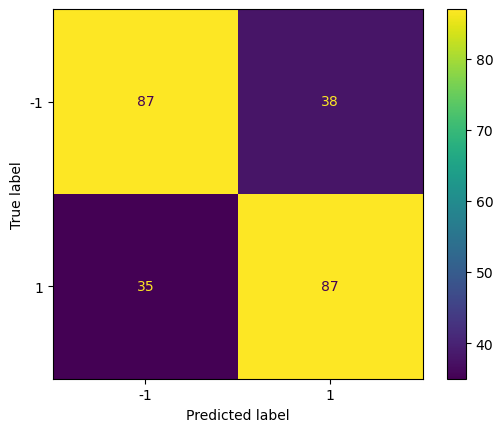

In [24]:
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=m,display_labels=model.classes_)
disp.plot()
plt.show()

In [25]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

          -1       0.71      0.70      0.70       125
           1       0.70      0.71      0.70       122

    accuracy                           0.70       247
   macro avg       0.70      0.70      0.70       247
weighted avg       0.70      0.70      0.70       247

